In [1]:
library (tidyverse)
library (tidymodels) 
library(repr)
library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv ("players.csv") 
players 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
players_data <- players |> 
    mutate (experience = as_factor (experience) , gender = as_factor (gender) )
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
most_played_group <- players |> 
    group_by ( experience ) |> 
    summarise ( avg_played_hours = mean (played_hours) ) 
most_played_group
#Regular players played the most 

experience,avg_played_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


In [5]:
numbers_group <- players |> 
    group_by (experience) |> 
    summarise (count = n() ) 
numbers_group
#Imbalance in the types of players 

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [6]:
subscription_by_group_pct <- players |> 
    group_by (experience, subscribe) |> 
    summarise (count = n() ) 
subscription_by_group_pct

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<chr>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
⋮,⋮,⋮
Regular,TRUE,29
Veteran,FALSE,15
Veteran,TRUE,33


In [7]:
subscription_pct <- players |> 
    group_by (subscribe) |> 
    summarise (count = n() ) 
subscription_pct

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,avg_played_hours
<fct>,<lgl>,<dbl>
Non-binary,TRUE,20.045455
Female,TRUE,13.451724
Agender,TRUE,6.250000
Male,TRUE,5.304301
⋮,⋮,⋮
Other,TRUE,0.200
Two-Spirited,TRUE,0.125
Two-Spirited,FALSE,0.000


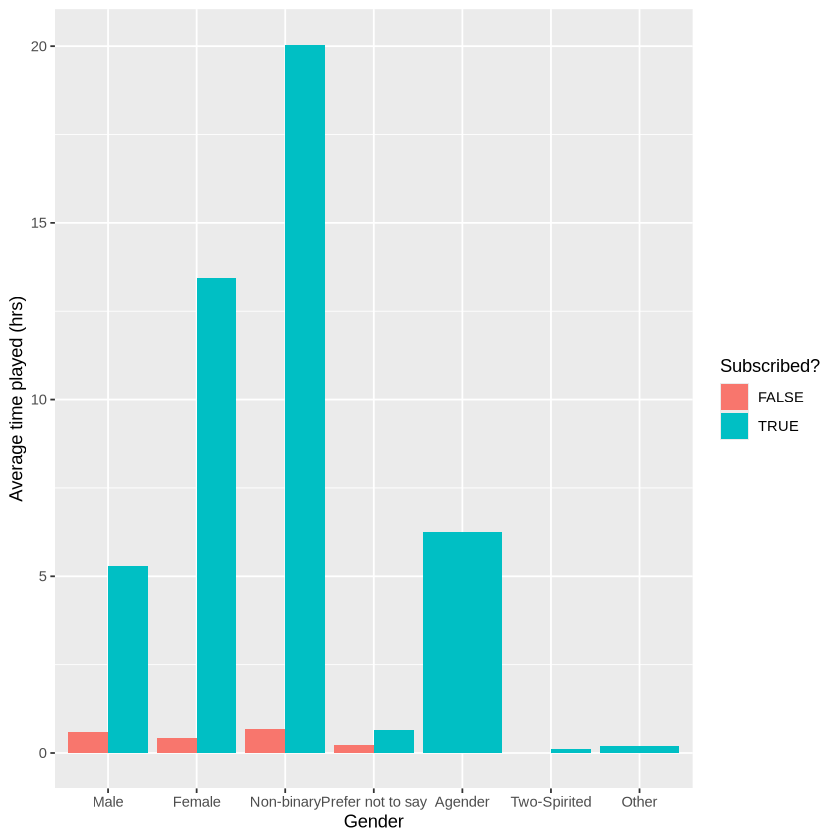

In [8]:
gender_time <- players_data |> 
    group_by (gender,subscribe) |> 
    summarise (avg_played_hours = mean (played_hours) ) |> 
    arrange (desc(avg_played_hours) ) 
gender_time
#non-binary ppl had the highest avg playing hours 
gender_time_plot <- ggplot ( gender_time, aes ( x = gender , y = avg_played_hours, fill = subscribe) ) +
    geom_bar (stat = "identity", position = "dodge" ) +
    labs ( x = "Gender" , y = "Average time played (hrs)", fill = "Subscribed?" ) 
gender_time_plot

# Subcribed players tend to have higher playing times! 

In [9]:
#### Q1 Potential Inquiry: Predicting whether the player is subscribed or not based on all other factors 
#### Knn classification 

# 0. All variables 
set.seed (2006) 


players_data_clean <- select ( players_data, - name , -hashedEmail) |> 
    drop_na() |>  ### dropped all rows with any NA data (2 rows) 
    mutate (subscribe = as.factor (subscribe) ) 

players_data_clean

players_split <- initial_split (data = players_data_clean , prop = 0.7 , strata = subscribe) #randomized, seed relevant 
players_training <- training ( players_split ) 
players_testing <- testing ( players_split) 


players_recipe <- recipe ( subscribe ~ ., data = players_training ) |>  ## All predictors, except for the name and emails (most likely irrelevant) 
    step_scale ( all_numeric_predictors() ) |> 
    step_center ( all_numeric_predictors() ) 

k_vals <- tibble ( neighbors = 1:10 ) 

knn_spec <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = tune () ) |> 
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

best_k_all <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (players_recipe ) |> 
    tune_grid (resamples = vfold_cv( data = players_training , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min (mean) |> 
    pull (neighbors) 

best_k_all
knn_spec_all <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_all ) |> 
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

players_fit <- workflow () |> 
    add_model ( knn_spec_all ) |> 
    add_recipe (players_recipe ) |> 
    fit ( players_training )

players_result <- predict (players_fit , players_testing)|>
    bind_cols (players_testing) 

accuracy_all <- metrics (data = players_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_all

players_result_cm <- conf_mat(data = players_result  , truth = subscribe , estimate = .pred_class)
players_result_cm

# Result: Only 66% accuracy even with the best k that minimizes error...

experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17


[1] 1

[1] 0.6610169

          Truth
Prediction FALSE TRUE
     FALSE     7   11
     TRUE      9   32

In [10]:
### Subscription patterns predicted by each variable 

###### Recipes!! 
recipe_experience <- recipe ( subscribe ~ experience , data = players_training ) 

recipe_played_hours <- recipe ( subscribe ~ played_hours, data = players_training ) |> 
    step_scale ( all_predictors() ) |> 
    step_center ( all_predictors() ) 

recipe_gender <- recipe ( subscribe ~ gender, data = players_training ) 

recipe_Age <- recipe ( subscribe ~ Age, data = players_training ) |> 
    step_scale ( all_predictors() ) |> 
    step_center ( all_predictors() ) 

In [11]:
# 1. experience 

#set.seed (2006)  ########################Ask!!! 
best_k_experience <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (recipe_experience) |>  ###
    tune_grid (resamples = vfold_cv( data = players_training , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 

best_k_experience

knn_spec_experience <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_experience ) |> ####
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

experience_fit <- workflow () |> 
    add_model ( knn_spec_experience ) |> 
    add_recipe (recipe_experience) |> 
    fit ( players_training )

experience_result <- predict ( experience_fit , players_testing)|>
    bind_cols (players_testing) 

experience_result

accuracy_experience <- metrics (data = experience_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_experience 

experience_result_cm <- conf_mat(data = experience_result  , truth = subscribe , estimate = .pred_class)
experience_result_cm

# Experience alone is not a good estimator of subscription (27% accuracy) 
# It never guessed true based on experience. Probably means that the "TRUE" data needs upsampling (?) 

# This shows that experience is definitely not a good estimate of subscription (sort of expected) 

##############3 Unless I set seed, the data gets k =4 and k = 1 alternately ( still the same accuracy though) 

[1] 4

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
FALSE,Veteran,TRUE,3.8,Male,17
FALSE,Amateur,TRUE,0.7,Female,21
FALSE,Regular,TRUE,0.0,Female,19
FALSE,Amateur,TRUE,0.5,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Regular,FALSE,0.1,Male,18
FALSE,Amateur,TRUE,0.0,Male,20
FALSE,Amateur,FALSE,0.0,Prefer not to say,17


[1] 0.2711864

          Truth
Prediction FALSE TRUE
     FALSE    16   43
     TRUE      0    0

In [12]:
#2 played_hours 

best_k_played_hours <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (recipe_played_hours) |>  ###
    tune_grid (resamples = vfold_cv( data = players_training , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 

best_k_played_hours

knn_spec_played_hours <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_played_hours ) |> ####
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

played_hours_fit <- workflow () |> 
    add_model ( knn_spec_played_hours ) |> 
    add_recipe (recipe_played_hours) |> 
    fit ( players_training )

played_hours_result <- predict ( played_hours_fit , players_testing)|>
    bind_cols (players_testing) 

played_hours_result

accuracy_played_hours <- metrics (data = played_hours_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_played_hours

played_hours_result_cm <- conf_mat(data = played_hours_result  , truth = subscribe , estimate = .pred_class)
played_hours_result_cm

#Played_hours predicts subscription with 42% accuracy. 

[1] 1

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
TRUE,Veteran,TRUE,3.8,Male,17
TRUE,Amateur,TRUE,0.7,Female,21
FALSE,Regular,TRUE,0.0,Female,19
TRUE,Amateur,TRUE,0.5,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Regular,FALSE,0.1,Male,18
FALSE,Amateur,TRUE,0.0,Male,20
FALSE,Amateur,FALSE,0.0,Prefer not to say,17


[1] 0.4237288

          Truth
Prediction FALSE TRUE
     FALSE    13   31
     TRUE      3   12

In [13]:
#3. gender 

best_k_gender <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (recipe_gender) |>  ###
    tune_grid (resamples = vfold_cv( data = players_training , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 

best_k_gender

knn_spec_gender <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_gender ) |> ####
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

gender_fit <- workflow () |> 
    add_model ( knn_spec_gender) |> 
    add_recipe (recipe_gender) |> 
    fit ( players_training )

gender_result <- predict ( gender_fit , players_testing)|>
    bind_cols (players_testing) 

gender_result

accuracy_gender <- metrics (data = gender_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_gender

gender_result_cm <- conf_mat(data = gender_result  , truth = subscribe , estimate = .pred_class)
gender_result_cm

#We get different k values each time (3, 5, 7, 9) #########ASK! 
#Gender predicts subscription with 27-29% accuracy 

[1] 9

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
FALSE,Veteran,TRUE,3.8,Male,17
FALSE,Amateur,TRUE,0.7,Female,21
FALSE,Regular,TRUE,0.0,Female,19
FALSE,Amateur,TRUE,0.5,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Regular,FALSE,0.1,Male,18
FALSE,Amateur,TRUE,0.0,Male,20
FALSE,Amateur,FALSE,0.0,Prefer not to say,17


[1] 0.2881356

          Truth
Prediction FALSE TRUE
     FALSE    13   39
     TRUE      3    4

In [14]:
#4. Age 

best_k_Age <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (recipe_Age) |>  ###
    tune_grid (resamples = vfold_cv( data = players_training , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 

best_k_Age

knn_spec_Age <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_Age ) |> ####
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

Age_fit <- workflow () |> 
    add_model ( knn_spec_Age) |> 
    add_recipe (recipe_Age) |> 
    fit ( players_training )

Age_result <- predict ( Age_fit , players_testing)|>
    bind_cols (players_testing) 

Age_result

accuracy_Age <- metrics (data = Age_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_Age

Age_result_cm <- conf_mat(data = Age_result  , truth = subscribe , estimate = .pred_class)
Age_result_cm

#Age predicts subscription with 32% Accuracy 

[1] 1

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
FALSE,Veteran,TRUE,3.8,Male,17
FALSE,Amateur,TRUE,0.7,Female,21
TRUE,Regular,TRUE,0.0,Female,19
FALSE,Amateur,TRUE,0.5,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Regular,FALSE,0.1,Male,18
FALSE,Amateur,TRUE,0.0,Male,20
FALSE,Amateur,FALSE,0.0,Prefer not to say,17


[1] 0.3220339

          Truth
Prediction FALSE TRUE
     FALSE    15   39
     TRUE      1    4

variable,best_k,accuracy
<chr>,<int>,<dbl>
all,1,0.6610169
played_hours,1,0.4237288
Age,1,0.3220339
gender,9,0.2881356
experience,4,0.2711864


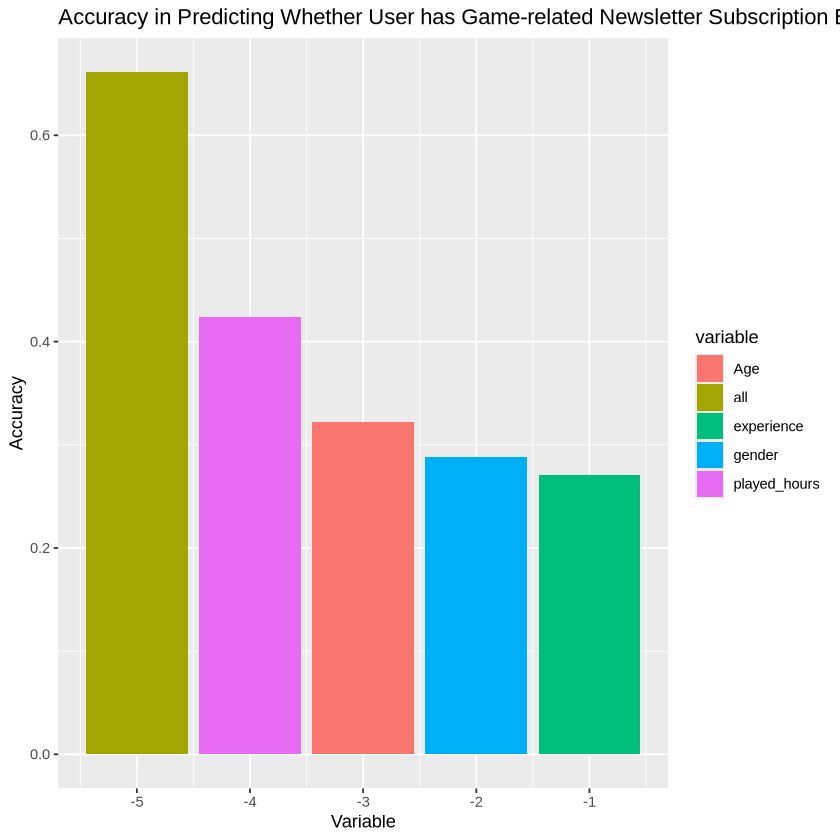

In [15]:
subscription_predict_results <- tibble (variable= c ("all" , "experience" , "played_hours" , "gender" , "Age" ) , 
                                        best_k = c (best_k_all , best_k_experience , best_k_played_hours , best_k_gender , best_k_Age) ,
                                        accuracy = c (accuracy_all , accuracy_experience , accuracy_played_hours, accuracy_gender, accuracy_Age ) )|>
                                arrange (desc(accuracy)  )
subscription_predict_results 
variables <- c( "All" , "Played Hours" , "Age" , "Gender" , "Experience" )
subscription_predict_results_plot <- ggplot ( subscription_predict_results , aes ( x = desc (fct_reorder (as_factor (variable), accuracy) ), y = accuracy , fill = variable ) ) + 
    geom_bar ( stat = "identity" ) + labs ( title = "Accuracy in Predicting Whether User has Game-related Newsletter Subscription Based on Each Variable", x = "Variable" , y = "Accuracy" )
subscription_predict_results_plot
#################Fix this plot 
# Conclusion from this inquiry: Numerical data predicts subscription better than factor data. played_hours is the best predictor of subscription. 

In [16]:
sessions <- read_csv ("sessions.csv")
sessions

sessions_data <- sessions |> 
    mutate (
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins"))
    )
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


hashedEmail,start_time,end_time,original_start_time,original_end_time,duration_minutes
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12,21
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12,7
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12,19


In [17]:
sessions_avg_played_mins <- sessions_data |> 
    select ( -original_start_time, -original_end_time ) |>
    group_by (hashedEmail) |> 
    summarise ( avg_time_mins = mean (duration_minutes ) ) #### We can also aggregate the min and max values if needed! 
sessions_avg_played_mins

players_complete <- players_data |>
  left_join( sessions_avg_played_mins, by = "hashedEmail")
players_complete

total_na <- players_complete |>
  summarise(across(everything(), ~sum(is.na(.))))
total_na # counts how many NA values there are in players_complete


hashedEmail,avg_time_mins
<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.00000
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.00000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.15385
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15.46774
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.00000
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.00000


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,50.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,5.00000
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,29.83333
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15.00000


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2,73


Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


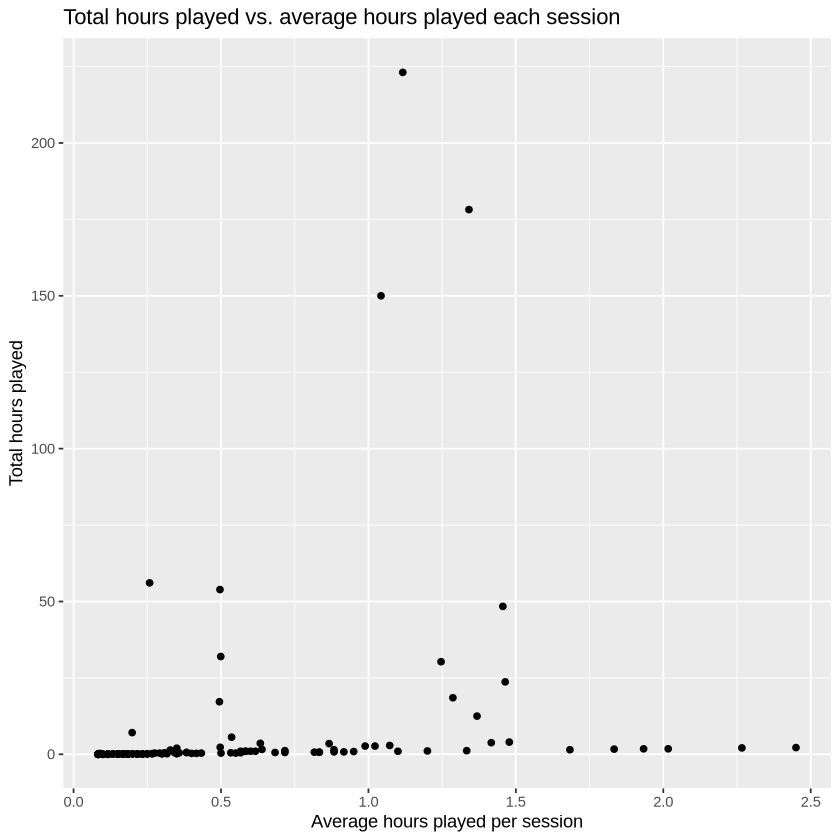

In [18]:
# The relationship between total hours played vs. average time played each session (hours) 

plays_plot <- ggplot ( players_complete, aes ( x = avg_time_mins/60 , y = played_hours ) ) + 
    geom_point () + 
    labs ( title = "Total hours played vs. average hours played each session" , x = "Average hours played per session" , y = "Total hours played" )
plays_plot

In [19]:
# 5. All variables with sessions data included 
set.seed (2006) 


players_data_clean_2 <- select ( players_complete, - name , -hashedEmail) |> 
    drop_na() |>  ### dropped all rows with any NA data (~73 rows)  #### Is there any way we don't have to drop NA's?
    mutate (subscribe = as.factor (subscribe) ) 

players_data_clean_2 

players_split_2 <- initial_split (data = players_data_clean_2 , prop = 0.7 , strata = subscribe) #randomized, seed relevant 
players_training_2 <- training ( players_split_2 ) 
players_testing_2 <- testing ( players_split_2 ) 


players_recipe_2 <- recipe ( subscribe ~ ., data = players_training_2 ) |>  ## All predictors, except for the name and emails (most likely irrelevant) 
    step_scale ( all_numeric_predictors() ) |> 
    step_center ( all_numeric_predictors() ) 

k_vals <- tibble ( neighbors = 1:10 ) 

knn_spec <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = tune () ) |> 
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

best_k_all_2 <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (players_recipe_2) |> 
    tune_grid (resamples = vfold_cv( data = players_training_2 , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 


best_k_all_2
knn_spec_all_2 <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_all_2 ) |> 
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

players_fit_2 <- workflow () |> 
    add_model ( knn_spec_all_2 ) |> 
    add_recipe (players_recipe_2 ) |> 
    fit ( players_training_2 )

players_result_2 <- predict (players_fit_2 , players_testing_2)|>
    bind_cols (players_testing_2) 

accuracy_all_2 <- metrics (data = players_result_2, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_all_2

players_result_cm_2 <- conf_mat(data = players_result  , truth = subscribe , estimate = .pred_class)
players_result_cm_2

# Result: 66% accuracy --> 70% accuracy (improved) BUT, the new dataset is significantly smaller (omits more than 70 rows due to the addition of avg_time_mins that has a lot of NA's) 


experience,subscribe,played_hours,gender,Age,avg_time_mins
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
Pro,TRUE,30.3,Male,9,74.77778
Veteran,TRUE,3.8,Male,17,85.00000
Veteran,FALSE,0.0,Male,17,5.00000
Amateur,TRUE,0.7,Female,21,50.00000
⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.3,Male,22,21.00000
Amateur,FALSE,0.0,Prefer not to say,17,5.00000
Amateur,FALSE,2.3,Male,17,29.83333


[1] 1

[1] 0.7027027

          Truth
Prediction FALSE TRUE
     FALSE     7   11
     TRUE      9   32

In [20]:
# 6. avg_time_mins 

recipe_avg_time_mins <- recipe ( subscribe ~ avg_time_mins, data = players_training_2) |> 
    step_center ( all_predictors () ) |> 
    step_scale ( all_predictors () ) 

best_k_avg_time_mins <- workflow () |> 
    add_model ( knn_spec ) |> 
    add_recipe (recipe_avg_time_mins) |>  ###
    tune_grid (resamples = vfold_cv( data = players_training_2 , v = 5 , strata = subscribe), grid = k_vals) |> 
    collect_metrics () |> 
    filter ( .metric == "accuracy" ) |> 
    slice_min(mean, n = 1, with_ties = FALSE) |>   # avoids multiple rows
    pull(neighbors) |> 
    as.integer() # defensive code to make sure the error doesn't occur 

best_k_avg_time_mins

knn_spec_avg_time_mins <- nearest_neighbor(weight_func = "rectangular" ,  neighbors = best_k_avg_time_mins ) |> ####
    set_engine ( "kknn" ) |> 
    set_mode ("classification" ) 

avg_time_mins_fit <- workflow () |> 
    add_model ( knn_spec_avg_time_mins) |> 
    add_recipe (recipe_avg_time_mins) |> 
    fit ( players_training_2 )

avg_time_mins_result <- predict ( avg_time_mins_fit , players_testing_2)|>
    bind_cols (players_testing_2) 

avg_time_mins_result

accuracy_avg_time_mins <- metrics (data = avg_time_mins_result, truth = subscribe , estimate = .pred_class) |>
    filter (.metric == "accuracy" ) |> 
    pull (.estimate)
accuracy_avg_time_mins

avg_time_mins_result_cm <- conf_mat(data = avg_time_mins_result  , truth = subscribe , estimate = .pred_class)
avg_time_mins_result_cm

#avg_time_mins predicts subscription with 68% Accuracy (on smaller dataset though, so the comparison is not fair) 

[1] 3

.pred_class,experience,subscribe,played_hours,gender,Age,avg_time_mins
<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
TRUE,Veteran,TRUE,3.8,Male,17,85
TRUE,Amateur,TRUE,0.7,Female,21,50
TRUE,Regular,TRUE,0.1,Male,21,9
TRUE,Amateur,TRUE,0.1,Male,17,13
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,FALSE,2.7,Non-binary,21,59.33333
FALSE,Amateur,FALSE,2.1,Male,24,136.00000
TRUE,Amateur,TRUE,0.8,Female,22,55.00000


[1] 0.6756757

          Truth
Prediction FALSE TRUE
     FALSE     4    6
     TRUE      6   21

In [22]:
subscription_predict_new <- add_row (subscription_predict_results , tibble ( variable = c ("all_complete" , "avg_time_mins" ) , 
                                                                    best_k =  c ( best_k_all_2 , best_k_avg_time_mins) , 
                                                                    accuracy = c (accuracy_all_2, accuracy_avg_time_mins) ) ) |> arrange (desc(accuracy)  )
subscription_predict_new

#With the addition of sessions data, the accuracy was improved, but these metrics are from the shrunk data set, which excluded more than 73 rows with NA values in avg_time_mins. Thus, this comparison is not fair. 
################## need to figure out how to compute metrics without excluding NA values 

variable,best_k,accuracy
<chr>,<int>,<dbl>
all_complete,1,0.7027027
avg_time_mins,3,0.6756757
all,1,0.6610169
played_hours,1,0.4237288
Age,1,0.3220339
gender,9,0.2881356
experience,4,0.2711864


In [29]:
###Important observation! 
#count_no_plays (below) filters out only those who essentially didn't play at all (therefore no data recorded) 
# It might be fair to exclude people who didn't play at all for the all_2 and avg_time_mins calculations 

count_no_plays <- players_complete |> filter (played_hours == 0 & is.na (avg_time_mins) == TRUE )
count_no_plays 
count_na <- players_complete |> filter (is.na (avg_time_mins) == TRUE )
count_na 
count_not_recorded <- players_complete |> filter (played_hours != 0 & is.na (avg_time_mins) == TRUE )
count_not_recorded

count_na_age <- players_complete |> filter ( is.na (Age) == TRUE )
count_na_age
# There are 71 people who didn't play at all, and 2 people who played but didn't have their time recorded (1 of the 2 people played A LOT) 
# When Age is NA , nothing else is NA 

experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0,Luna,Female,19,NA
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0,Nyla,Female,22,NA
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0,Daniela,Male,17,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0,Orion,Male,17,NA
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20,NA
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17,NA


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0,Luna,Female,19,NA
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0,Nyla,Female,22,NA
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0,Daniela,Male,17,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0,Orion,Male,17,NA
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20,NA
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17,NA


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,NA
Amateur,TRUE,55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1,0.3,Joaquim,Male,17,NA


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_time_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA,8
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15
